# **LendSmart Credit Risk Analysis**

### **Luis Alan Morales Castillo A01659147**
### **Paulina Díaz Arroyo A010295932**
### **Rodrigo Jiménez Ortiz A01029623**

<u>**Section 1: Project Setup & Data Loading**</u>

+ Import all necessary libraries

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

+ Load the credit_risk_data.csv file.

In [3]:
df=pd.read_csv("../datos/credit_risk_data-1.csv")
df.head()

,application_id,application_date,loan_amount,annual_income,employment_years,job_stability_score,credit_score,credit_utilization,payment_history_score,open_credit_lines,debt_to_income_ratio,savings_ratio,asset_value,age,education_level,marital_status,residential_stability,loan_status
0,APP_2328,2022-01-01,132221.82,60451.82,6.6,0.898,679,0.106,0.876,1,0.451,0.500,352569.55,41,High School,Married,3.5,0
1,APP_558,2022-01-01,134906.42,114634.08,10.3,0.808,718,0.030,0.719,4,0.090,0.235,224364.21,46,Masters,Divorced,11.4,0
2,APP_2477,2022-01-01,30285.19,82772.53,12.1,0.964,768,0.174,0.775,6,0.201,0.172,514765.55,44,High School,Widowed,8.6,0
3,APP_741,2022-01-01,32516.09,94023.36,9.1,0.690,670,0.141,0.993,3,0.322,0.368,182541.72,26,Bachelors,Single,3.9,0
4,APP_145,2022-01-02,77900.99,53515.02,7.2,0.679,651,0.097,0.946,2,0.222,0.324,223691.29,50,Associates,Single,9.6,0


+ Perform an initial inspection: .head(), .info(), .describe().

In [ ]:
display(df.head())
display(df.describe())
display(df.info())

,application_id,application_date,loan_amount,annual_income,employment_years,job_stability_score,credit_score,credit_utilization,payment_history_score,open_credit_lines,debt_to_income_ratio,savings_ratio,asset_value,age,education_level,marital_status,residential_stability,loan_status
0,APP_2328,2022-01-01,132221.82,60451.82,6.6,0.898,679,0.106,0.876,1,0.451,0.500,352569.55,41,High School,Married,3.5,0
1,APP_558,2022-01-01,134906.42,114634.08,10.3,0.808,718,0.030,0.719,4,0.090,0.235,224364.21,46,Masters,Divorced,11.4,0
2,APP_2477,2022-01-01,30285.19,82772.53,12.1,0.964,768,0.174,0.775,6,0.201,0.172,514765.55,44,High School,Widowed,8.6,0
3,APP_741,2022-01-01,32516.09,94023.36,9.1,0.690,670,0.141,0.993,3,0.322,0.368,182541.72,26,Bachelors,Single,3.9,0
4,APP_145,2022-01-02,77900.99,53515.02,7.2,0.679,651,0.097,0.946,2,0.222,0.324,223691.29,50,Associates,Single,9.6,0


,loan_amount,annual_income,employment_years,job_stability_score,credit_score,credit_utilization,payment_history_score,open_credit_lines,debt_to_income_ratio,savings_ratio,asset_value,age,residential_stability,loan_status
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,155716.305344,67707.807596,6.675640,0.634643,681.728400,0.358176,0.740733,3.451600,0.408094,0.320784,175666.741236,42.045600,6.023200,0.265600
std,149605.357952,27302.931731,3.488021,0.293276,88.683309,0.289995,0.285966,2.083793,0.224736,0.192079,182652.568930,12.092395,3.205397,0.441741
min,5000.000000,15000.000000,0.000000,0.011000,334.000000,0.004000,0.029000,0.000000,0.009000,0.000000,550.630000,18.000000,0.000000,0.000000
25%,42984.517500,47475.317500,4.000000,0.375500,642.750000,0.131000,0.517500,2.000000,0.228000,0.161000,49513.082500,34.000000,3.600000,0.000000
50%,97054.315000,66963.475000,6.700000,0.752000,700.000000,0.246000,0.880500,3.000000,0.359000,0.327000,121018.750000,42.000000,5.900000,0.000000
75%,213214.992500,87347.642500,9.300000,0.866000,743.000000,0.592250,0.956000,5.000000,0.565000,0.464000,235513.902500,50.000000,8.400000,1.000000
max,500000.000000,149929.960000,19.300000,0.999000,850.000000,0.998000,1.000000,11.000000,0.979000,0.893000,1000000.000000,75.000000,16.400000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   application_id         2500 non-null   object 
 1   application_date       2500 non-null   object 
 2   loan_amount            2500 non-null   float64
 3   annual_income          2500 non-null   float64
 4   employment_years       2500 non-null   float64
 5   job_stability_score    2500 non-null   float64
 6   credit_score           2500 non-null   int64  
 7   credit_utilization     2500 non-null   float64
 8   payment_history_score  2500 non-null   float64
 9   open_credit_lines      2500 non-null   int64  
 10  debt_to_income_ratio   2500 non-null   float64
 11  savings_ratio          2500 non-null   float64
 12  asset_value            2500 non-null   float64
 13  age                    2500 non-null   int64  
 14  education_level        2500 non-null   object 
 15  mari

None

+ Write a brief summary of your initial findings 

The dataset contains 2,500 loan application records from 2022 to 2024, all without null values. The variables cover financial, demographic, and credit aspects of the applicant. The target variable (loan_status) indicates whether the loan was repaid or defaulted on, with a default rate of 26.56%.

The data shows that loan applicants have highly varied financial profiles. For example, the loan amount requested ranges from \$5,000 to \$500,000, with an average of approximately \$155,000. Annual income also varies considerably, from \$15,000 to nearly \$150,000. Most customers have a credit score of 682, but there are also individuals with very low scores. Indicators such as credit utilization, job stability score, and payment history score reflect that many customers have good credit history, although there are extreme values ​​that could indicate risk. Furthermore, the debt-to-income ratio shows that some applicants have a high debt burden relative to their income. Variables such as savings ratio, asset value, and age also show significant differences between individuals. All of this indicates that LendSmart needs an analysis model capable of accurately distinguishing between reliable and unreliable customers.

<u>**Section 2: Exploratory Data Analysis (EDA)**</u>

+ **Target Variable**: Plot the distribution of loan_status and calculate the exact default rate.

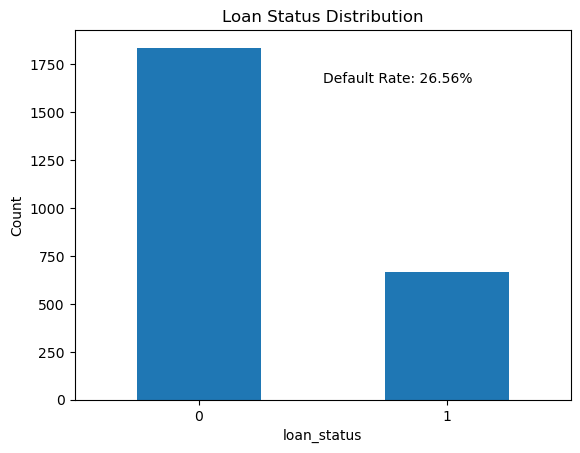

In [5]:
default_rate=(len(df[df["loan_status"]==1])/len(df))*100
plt.figure()
df["loan_status"].value_counts().plot(kind="bar")
plt.title("Loan Status Distribution")  
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.annotate(f'Default Rate: {default_rate:.2f}%', xy=(0.5, max(df["loan_status"].value_counts())*0.9)),
plt.show() 


+ **Continuous Variables**: For key predictors (credit_score, annual_income, debt_to_income_ratio, etc.), create plots (e.g., box plots or histograms) that **compare the distribution for defaulters (1) vs. non-defaulters (0)**.

In [84]:
numeric_features=["loan_amount", "annual_income", "employment_years","credit_score", "payment_history_score", "debt_to_income_ratio", "job_stability_score", "credit_utilization", "open_credit_lines","asset_value","age","residential_stability","savings_ratio"]
df[numeric_features + ["loan_status"]].corr()["loan_status"].abs().sort_values(ascending=False)

loan_status              1.000000
payment_history_score    0.931093
job_stability_score      0.912006
credit_utilization       0.906134
debt_to_income_ratio     0.785210
credit_score             0.728160
savings_ratio            0.697444
employment_years         0.628269
residential_stability    0.531898
annual_income            0.508140
asset_value              0.430579
open_credit_lines        0.429446
age                      0.355555
loan_amount              0.003192
Name: loan_status, dtype: float64

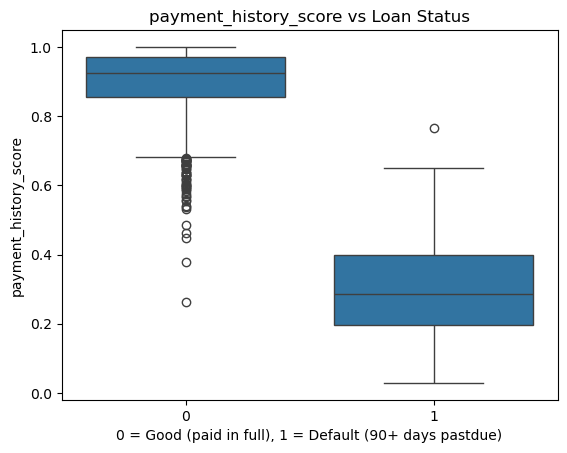

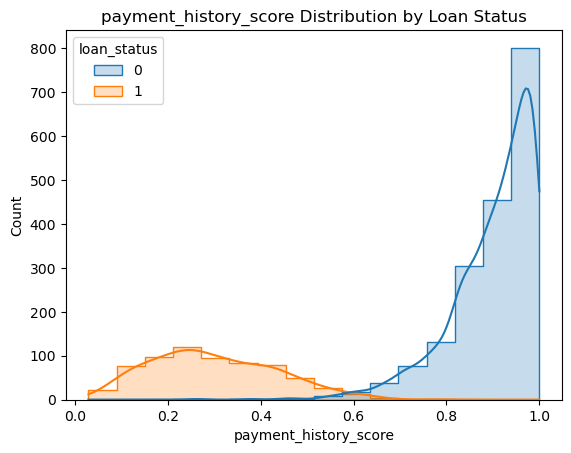

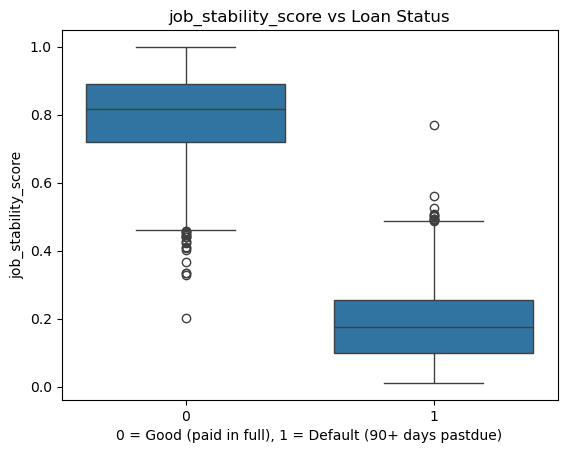

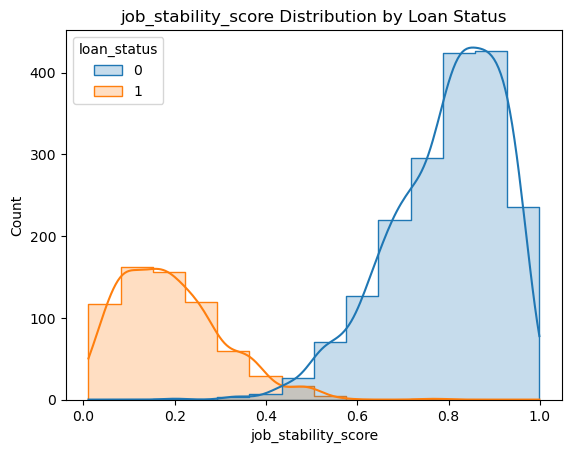

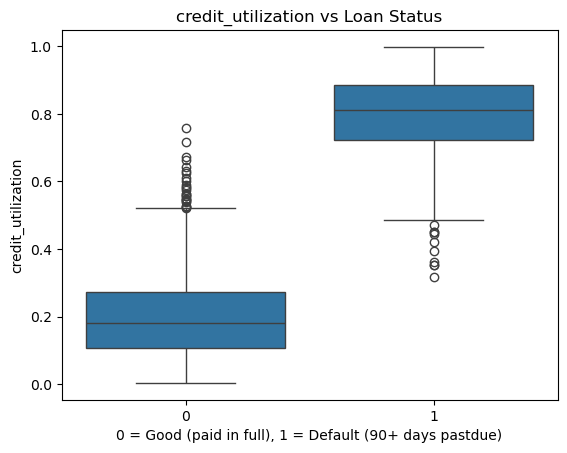

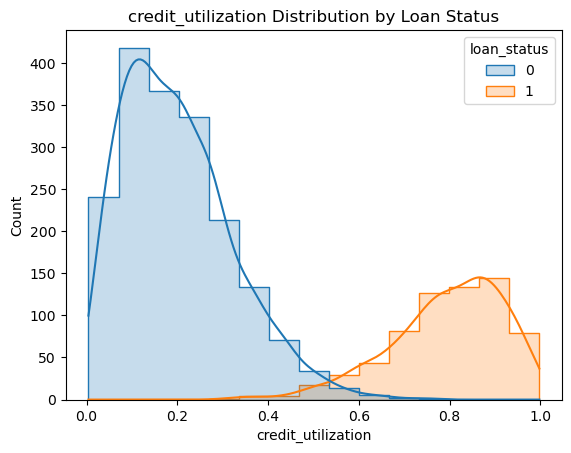

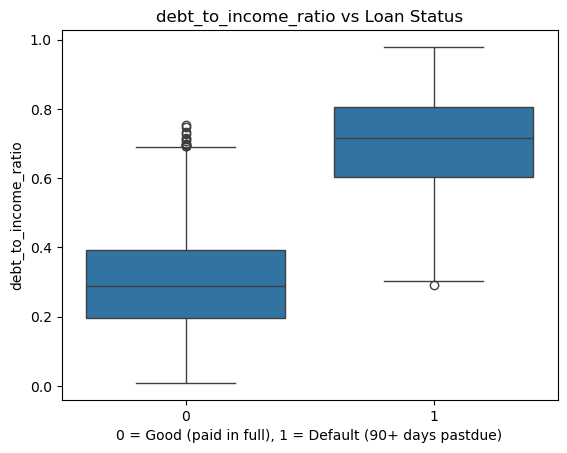

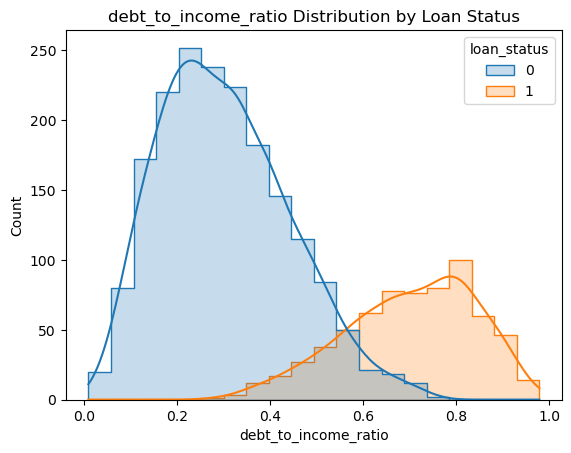

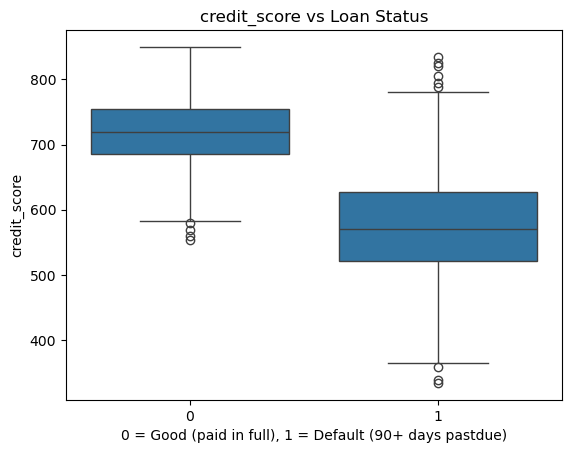

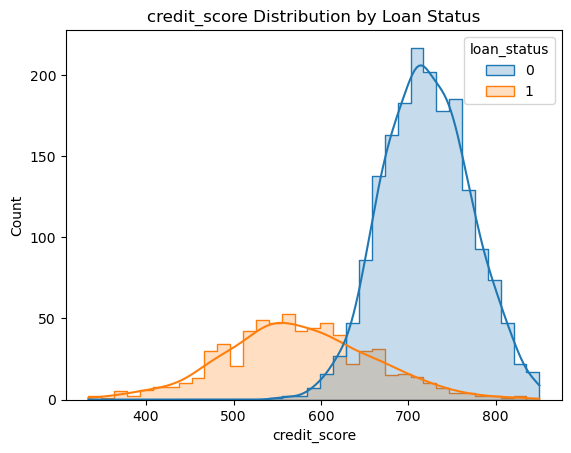

In [86]:
key_predicors=["payment_history_score", "job_stability_score", "credit_utilization", "debt_to_income_ratio", "credit_score"] # Top 5 predictors based on correlation with loan_status
for predictor in key_predicors:
    # Boxplots
    plt.figure()
    sns.boxplot(x="loan_status", y=predictor, data=df)
    plt.title(f"{predictor} vs Loan Status")
    plt.xlabel("0 = Good (paid in full), 1 = Default (90+ days pastdue)")
    plt.ylabel(predictor)
    plt.show()
    # Histograms
    plt.figure()    
    sns.histplot(data=df, x=predictor, hue="loan_status", kde=True, element="step", stat="count")
    plt.title(f"{predictor} Distribution by Loan Status")
    plt.xlabel(predictor)
    plt.ylabel("Count")
    plt.show()


+ **Categorical Variables**: Create bar plots showing the mean default rate for each category in education_level and marital_status.

C:\Users\Asus\AppData\Local\Temp\ipykernel_13240\3893837441.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=edu_default.index, y=edu_default.values, palette='Blues_d')


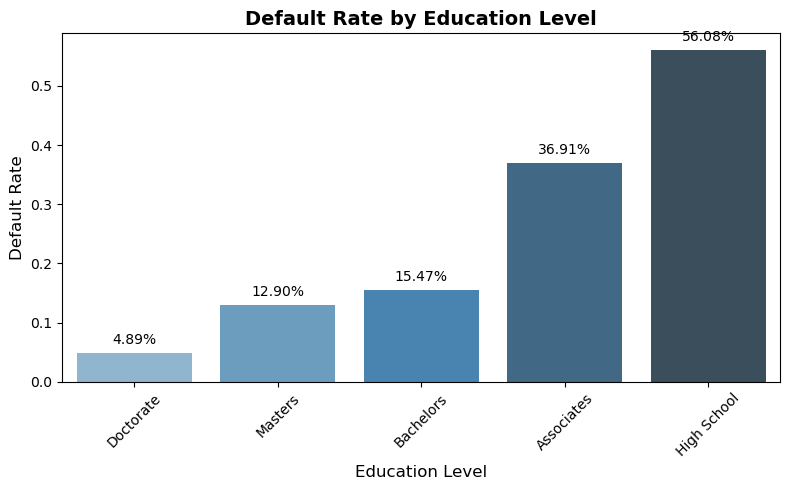

In [87]:
edu_default = df.groupby('education_level')['loan_status'].mean().sort_values()
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=edu_default.index, y=edu_default.values, palette='Blues_d')

plt.title('Default Rate by Education Level', fontsize=14, weight='bold')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Default Rate', fontsize=12)
plt.xticks(rotation=45)

for i, rate in enumerate(edu_default.values):
    plt.text(i, rate + 0.01, f'{rate:.2%}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_13240\585239893.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=marital_default.index, y=marital_default.values, palette='Greens_d')


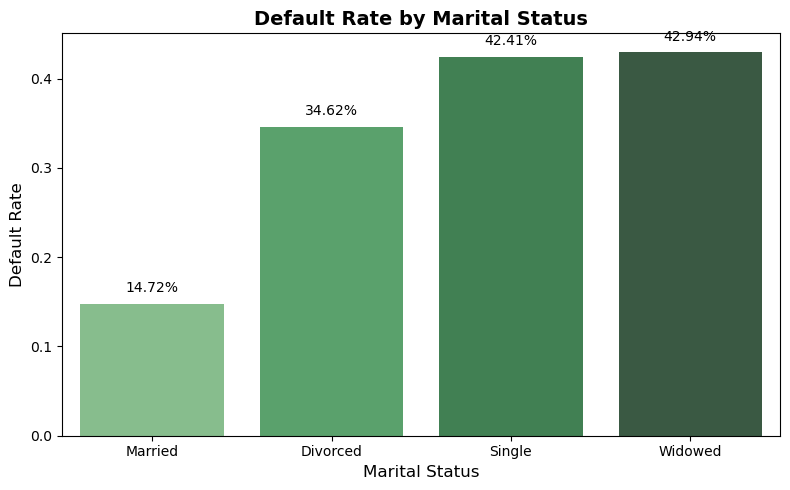

In [ ]:
marital_default = df.groupby('marital_status')['loan_status'].mean().sort_values()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=marital_default.index, y=marital_default.values, palette='Greens_d')

plt.title('Default Rate by Marital Status', fontsize=14, weight='bold')
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Default Rate', fontsize=12)

for i, rate in enumerate(marital_default.values):
    plt.text(i, rate + 0.01, f'{rate:.2%}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

+ **Correlations**: Generate a correlation matrix heatmap for all numeric predictors.

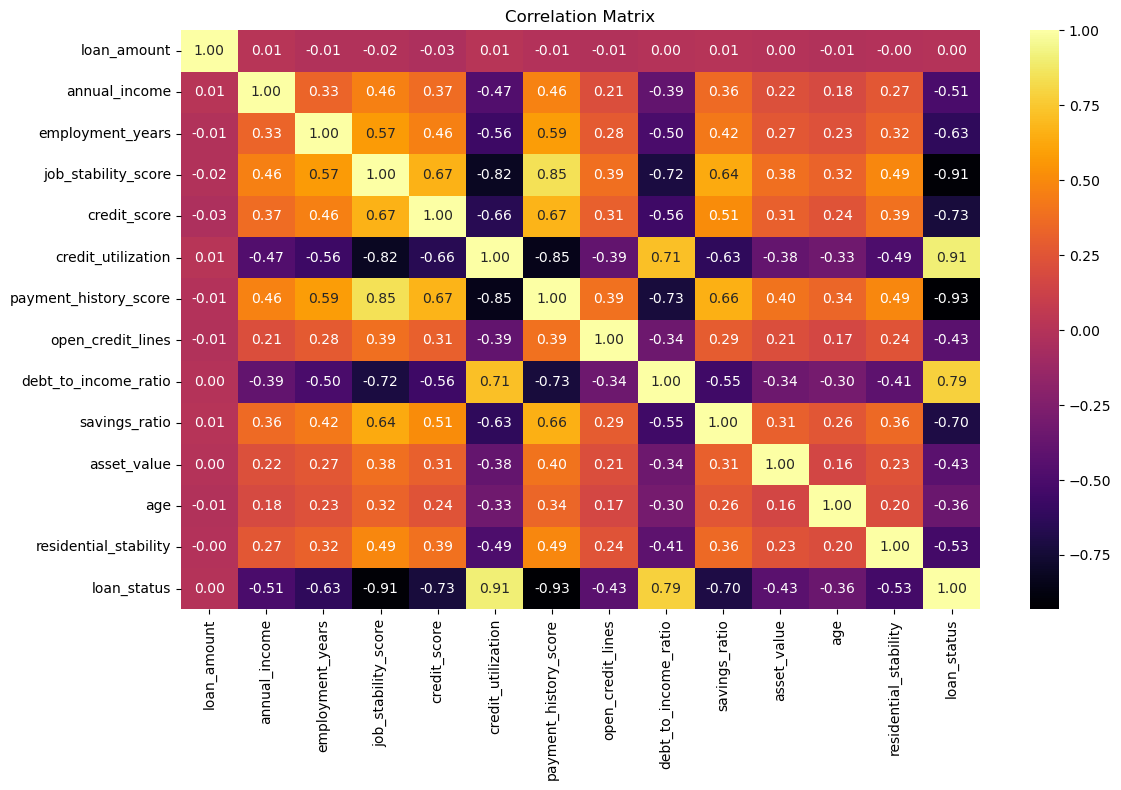

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='inferno')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

<u>**Section 3: Data Preprocessing**</u>

+ **Handle Categorical Data**: Convert education_level and marital_status into numerical dummy variables (pd.get_dummies()).

In [90]:
dummies_edu = pd.get_dummies(df["education_level"], prefix="edu", drop_first=True)
dummies_mar = pd.get_dummies(df["marital_status"], prefix="marital", drop_first=True)

dummies_edu

,edu_Bachelors,edu_Doctorate,edu_High School,edu_Masters
0,False,False,True,False
1,False,False,False,True
2,False,False,True,False
3,True,False,False,False
4,False,False,False,False
...,...,...,...,...
2495,True,False,False,False
2496,False,False,False,False
2497,False,False,False,True
2498,False,False,True,False


+ **Define Predictors (X) and Target (y)**: Create X (features) and y (target) variables. Be sure to drop non-predictive columns like application_id.

In [91]:
x_features=["credit_score", "payment_history_score", "debt_to_income_ratio", "job_stability_score", "credit_utilization"]
X = pd.concat([df[x_features], dummies_edu, dummies_mar], axis=1)

y_target=df["loan_status"]

+ **Train-Test Split**: Split the data into X_train, X_test, y_train, y_test. Use test_size=0.2 and a random_state=42 for reproducibility.

In [92]:
x_train, x_test, y_train, y_test=train_test_split(X, y_target, test_size=0.2, random_state=42, stratify=y_target)

+ **Standardization**: Initialize a StandardScaler. **Fit** it only on X_train, then **transform** both X_train and X_test. This is critical for interpreting LDA coefficients.

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

 <u>**Section 4: Statistical Assumption Testing**</u>

+ **Key Statistical Assumptions Differentiating LDA and QDA**

    Both Linear Discriminant Analysis (LDA) and Quadratic Discriminant Analysis (QDA) assume that the predictors within each class follow a multivariate normal distribution. The main difference lies in how they treat the covariance matrices of these distributions.

    + Multivariate Normality:
        
        This assumption means that the predictors for each class should be approximately normally distributed. Based on the EDA plots, most variables (credit_score, credit_utilization, debt_to_income_ratio, job_stability_score) show roughly bell-shaped distributions, though some exhibit moderate skewness (payment_history_score being the most skewed). While not perfectly normal, the data are reasonably smooth and unimodal within each loan status group, suggesting that the multivariate normality assumption is reasonably met for applying discriminant analysis.

    + Homogeneity of Covariance Matrices:
        
        LDA assumes that all classes share a single covariance matrix, producing linear decision boundaries, while QDA allows each class to have its own covariance matrix, resulting in quadratic boundaries. If the class scatterplots or spreads differ noticeably—as suggested by some variation in variable ranges between “Default” and “Paid in Full” loans—this indicates unequal covariance structures.

+ **Hypothesis:**
If the covariance matrices are unequal, we expect QDA to outperform LDA, as QDA can better model differing class variances and correlations, though at the cost of greater model complexity.

<u>**Section 5: Model 1 - Linear Discriminant Analysis (LDA)**</u>

+ Initialize LinearDiscriminantAnalysis and fit it on your standardized X_train and y_train.

In [95]:
LDA=LinearDiscriminantAnalysis()
LDA.fit(x_train_scaled, y_train.values.ravel())

LinearDiscriminantAnalysis()

+ Interpret Coefficients: Extract the lda.coef_. Place them in a DataFrame with their feature names. Sort by absolute value.

In [96]:
coef=LDA.coef_[0]
feature_names=x_train.columns

df_coef=pd.DataFrame({"Feature":feature_names, "Coefficient":coef})
df_coef["Abs_Coefficient"]=df_coef["Coefficient"].abs()
df_coef.sort_values(by="Abs_Coefficient", ascending=False, inplace=True)
df_coef

,Feature,Coefficient,Abs_Coefficient
1,payment_history_score,-15.543899,15.543899
3,job_stability_score,-13.070033,13.070033
4,credit_utilization,11.643710,11.643710
2,debt_to_income_ratio,4.506771,4.506771
0,credit_score,-3.937238,3.937238
7,edu_High School,1.133565,1.133565
10,marital_Single,0.515575,0.515575
9,marital_Married,-0.492058,0.492058
6,edu_Doctorate,-0.417348,0.417348
5,edu_Bachelors,-0.181114,0.181114


+ Write a clear interpretation: Which 3-5 variables are the most important drivers of default risk? What does the sign (+/-) tell you?

The top predictors of loan default risk, based on the absolute value of LDA coefficients, are:

- Payment History Score (−15.54): A poor payment history greatly increases default risk. Customers who have missed prior payments or shown inconsistent repayment patterns are significantly more likely to default again.

- Job Stability Score (−13.07): Applicants with unstable employment—frequent job changes or short tenure—tend to face higher financial uncertainty, which increases the likelihood of falling behind on loan payments.

- Credit Utilization (+11.64): High credit utilization indicates that the borrower is already heavily relying on credit. This pressure raises the probability of default, as the borrower has limited capacity to absorb additional debt.

- Debt-to-Income Ratio (+4.51): This is one of the strongest predictors. Applicants whose debt obligations take up a large share of their income are much more likely to struggle with repayment and default.

- Credit Score (−3.94): Lower credit scores strongly correlate with higher default risk. Credit Score remains a reliable indicator of financial discipline and borrower reliability.

<u>**Section 6: Model 2 - Quadratic Discriminant Analysis (QDA)**</u>

+ Initialize QuadraticDiscriminantAnalysis and fit it on your standardized X_train and y_train

In [97]:
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(x_train_scaled, y_train)

QuadraticDiscriminantAnalysis()

<u>**Section 7: Model Evaluation & Comparison**</u>

- Generate predictions (.predict()) for both models on the X_test data.

In [98]:
y_pred_lda = LDA.predict(x_test_scaled)
y_pred_qda = QDA.predict(x_test_scaled)

- Confusion Matrices: For both models, generate and plot a ConfusionMatrixDisplay.

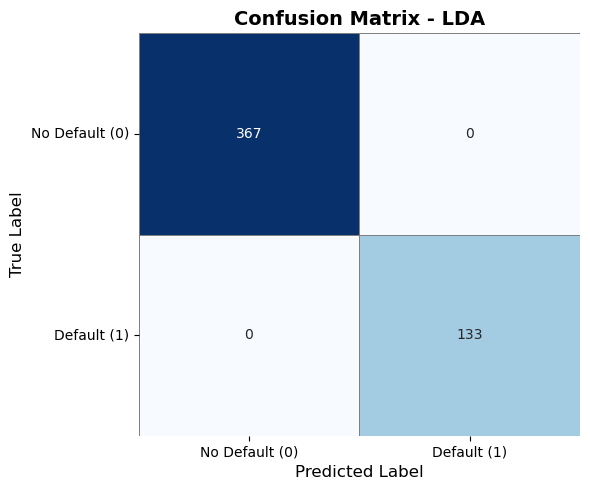

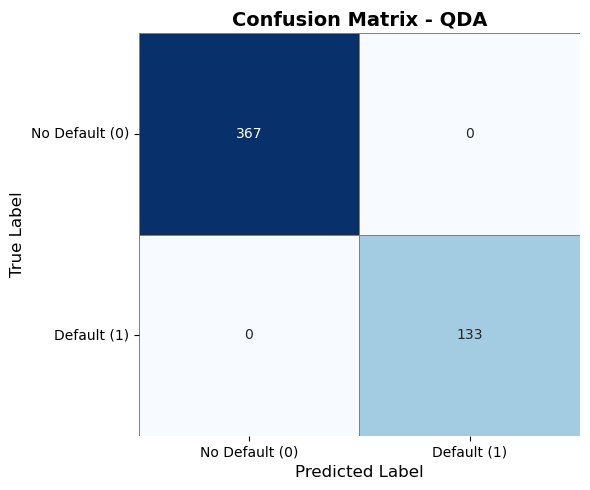

In [99]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    labels = ["No Default (0)", "Default (1)"]

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels, linewidths=0.5, linecolor='gray')

    plt.title(f"Confusion Matrix - {model_name}", fontsize=14, weight='bold')
    plt.xlabel("Predicted Label", fontsize=12)
    plt.ylabel("True Label", fontsize=12)
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
plot_confusion_matrix(y_test, y_pred_lda, "LDA")
plot_confusion_matrix(y_test, y_pred_qda, "QDA")


- Classification Reports: For both models, print the classification_report.

In [100]:
print("Classification Report - LDA")
print(classification_report(y_test, y_pred_lda))

print("Classification Report - QDA")
print(classification_report(y_test, y_pred_qda))

Classification Report - LDA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       367
           1       1.00      1.00      1.00       133

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

Classification Report - QDA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       367
           1       1.00      1.00      1.00       133

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



- ROC Curves: Generate the RocCurveDisplay for both models and plot them on the same axis for a
direct visual comparison. Report the AUC (Area Under the Curve) score for both.

<Figure size 800x600 with 0 Axes>

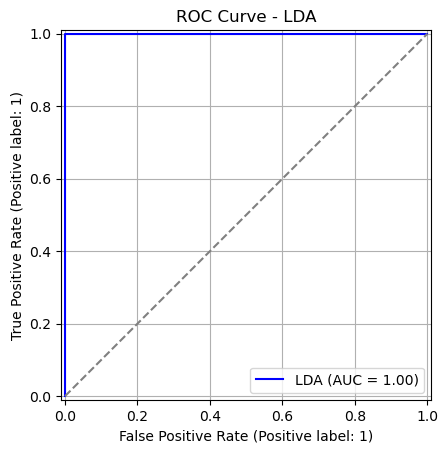

<Figure size 800x600 with 0 Axes>

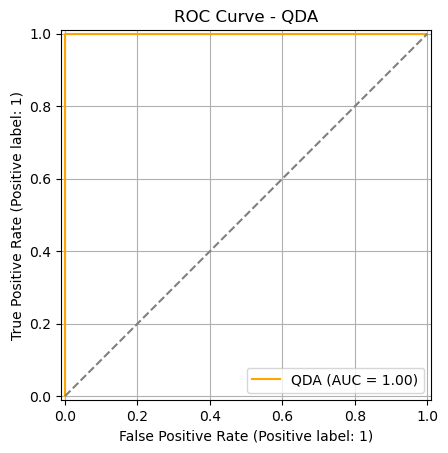

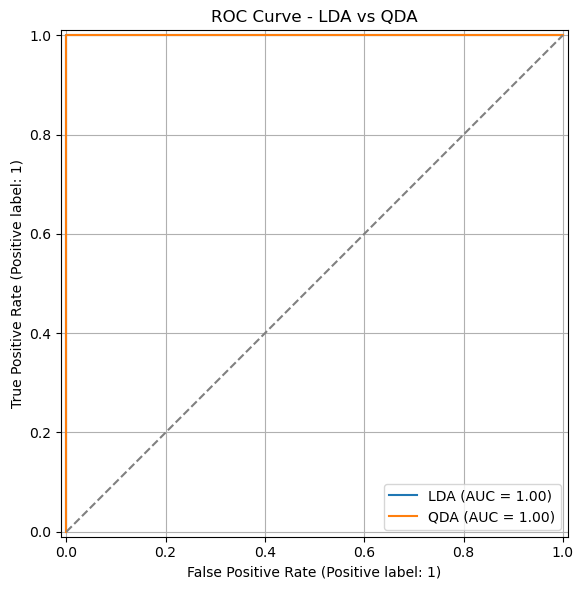

AUC Score - LDA: 1.0000
AUC Score - QDA: 1.0000


In [80]:
y_proba_lda = LDA.predict_proba(x_test_scaled)[:, 1]
y_proba_qda = QDA.predict_proba(x_test_scaled)[:, 1]

plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(y_test, y_proba_lda, name="LDA", color="blue")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.title("ROC Curve - LDA")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(y_test, y_proba_qda, name="QDA", color="orange")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.title("ROC Curve - QDA")
plt.grid(True)
plt.show()

# Combined plot
fig, ax = plt.subplots(figsize=(8, 6))

RocCurveDisplay.from_predictions(y_test, y_proba_lda, name="LDA", ax=ax)
RocCurveDisplay.from_predictions(y_test, y_proba_qda, name="QDA", ax=ax)

ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
ax.set_title("ROC Curve - LDA vs QDA")
ax.grid(True)

plt.tight_layout()
plt.show()
auc_lda = roc_auc_score(y_test, y_proba_lda)
auc_qda = roc_auc_score(y_test, y_proba_qda)

print(f"AUC Score - LDA: {auc_lda:.4f}")
print(f"AUC Score - QDA: {auc_qda:.4f}")

<u>**Section 8: Technical Conclusion & Model Selection**</u>

Based on the evaluation results in Section 7, both the LDA and QDA models achieve perfect classification performance on this test set, as shown by the ROC curves for both models reaching the top-left corner of the chart and yielding an AUC of 1.0. This means that each model correctly identified every single default and non-default case, with no false positives and no false negatives. In other words, the predicted probabilities for defaulters were always higher than those for non-defaulters, showing complete separability between the two groups. Although this kind of perfect performance is extremely rare in real-world lending environments, it is statistically possible when the underlying predictors are highly informative and the dataset exhibits a strong, clean distinction between risk profiles. The overlap of the two curves indicates that LDA and QDA produced the same correct classifications despite using different types of decision boundaries, reinforcing the strength of the financial indicators used. For the business, this result implies that the model can accurately distinguish between high-risk and low-risk borrowers in this sample, providing a powerful tool for reducing default losses with minimal risk of unnecessarily rejecting good customers, while noting that further validation on real-world data is recommended to confirm this level of performance. 

LDA works because it assumes that both classes share the same covariance structure, which creates a clean linear boundary between defaulters and non-defaulters. This makes it stable, easy to interpret, and highly reliable when the predictors are well-separated.
QDA works because it allows each class to have its own covariance matrix, giving it the flexibility to model more complex, curved decision boundaries. When the data is highly structured and the class distributions differ significantly, QDA can capture these patterns and achieve perfect separation.

In this case, either model works equally well, but LDA may be preferred for its simplicity and interpretability, especially since the results were the same. This means that LDA got the same results as QDA, but with simpler assumptions.